In [1]:
## pylab, tools for plotting
%pylab inline

## Import Modules
import sklearn
import codecs
import pandas as pds

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_data(f):
    ## Open file with latin1 encoding;
    with codecs.open(root+f,encoding='latin1') as f:
        col = []
        l=f.readline().strip()
        
        ## Loop that reads the file line by line:
        while l:
            col.append(' '.join(l.split()[1:]))
            l=f.readline().strip()
        
        ## Convert into pandas frame and csv file:
        dat = pds.read_csv(f,sep=';', skipinitialspace=True,lineterminator ='\n',infer_datetime_format=True)
        dat = dat.drop(dat.columns[-1],1) ## .drop removes columns or rows - columns -1 to 1
        
        dat.columns = [dat.columns[0]] + col
        dat = dat.set_index(dat.columns[0])
    return dat

In [3]:
## Setting up file:
root = '/Users/kimnielsen/JupyterNotebook/BigData/'
data = read_data('onlinedata.txt')
data = data.drop(['Temperatur i Malling', 'Vindhastighed i Malling', 'Havmøller DK', 'Landmøller DK'], axis=1)

## Save CO2 column in its own variabel:
co2 = data['CO2 udledning']

In [4]:
from sklearn.svm import SVR

## Initialize the model:
model = SVR(kernel='linear')
model_train = model.fit(data, co2)
model_prec = model.predict(data)

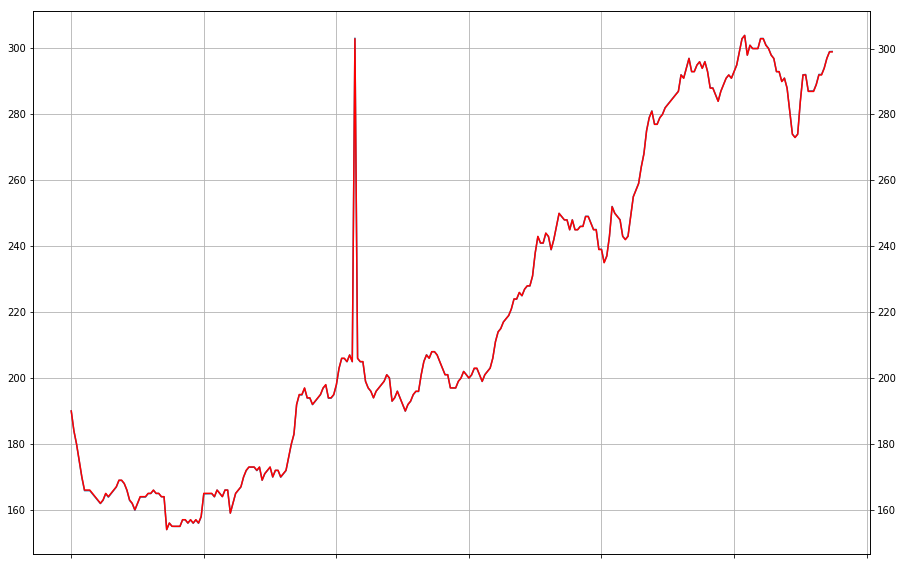

In [5]:
## Plot the results:
figure, ax = plt.subplots(figsize=(15, 10))
ax.plot(model_prec), grid()
ax2 = ax.twinx()
co2.plot(style='r')

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [9]:
clf = sklearn.svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, model_prec, co2, cv=5)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


ValueError: Expected 2D array, got 1D array instead:
array=[165.9050831  162.97223997 165.98299067 168.99953495 165.99105557
 162.95482796 161.95708298 161.97550466 163.96271325 163.96523148
 163.96440186 165.01842298 165.02303943 166.02058257 165.03608178
 165.05070179 164.04978115 164.04321241 155.05441903 155.06286545
 155.05840821 157.06387563 156.05372185 157.04036254 156.02274582
 157.03378615 156.0098572  164.92853408 164.94231844 164.98791952
 164.99148152 164.01795563 166.08871827 165.10052293 164.08719019
 166.09528641 166.07292959 162.04383126 165.04133716 166.01116333
 167.03225986 170.00597275 173.00966024 173.0073511  172.99203857
 169.07742633 172.03379588 172.99981879 170.0230986  172.02321357
 172.01225177 169.96907253 170.97576152 171.96416049 179.91710188
 194.89965135 191.966106   193.98902809 194.98786455 193.90523519
 193.94279403 194.91729515 197.89953268 205.96952603 205.99764523
 204.96982329 204.97436254 197.03378799 194.04238115 196.03452096
 197.03862605 198.03168962 199.05655857 193.04156119 194.0891912
 196.05565701 194.05907344 192.00485535 190.00292925 191.98401236
 192.98439845 194.98340204 195.97148165 195.95133598 205.09983784
 207.09480341 206.04462896 208.03580449 207.05436913 204.99898838
 203.04635205 201.06643383 201.07321555 197.08535992 197.02959008
 197.02167086 199.0246482  200.03083351 201.09959463 200.0037849
 200.93751006 202.89976907 202.91178352 201.00942654 198.99661238
 201.06516612 202.07953568 203.09955633 206.07823898 223.94414543
 227.94808644 240.91619524 242.90216644 247.98564294 247.99466008
 245.03211845 245.02919502 246.02407675 246.05556251 249.08456029
 249.06852217 245.06952974 245.08384184 239.10043009 239.07486642
 243.0765935  250.0428536  249.03656577 248.02798442 243.04023843
 242.07505627 243.07461164 249.08505208 277.01994294 278.99550304
 293.96016342 295.96211406 292.99905713 287.9857101  285.97204841
 283.96622771 286.94315464 290.90565484 290.93315807 292.93450762
 294.92086022 302.9049554  299.93937328 299.93806502 302.9696521
 302.97584751 301.04012519 299.99111877 297.9895706  296.90968567
 292.92772478 292.91194339 290.96933962 287.92742136 280.98666197
 274.00120909 283.96213634 291.95827157 292.05451881 287.03458235
 287.05017235 287.08882049 289.10026092 292.07849273 292.04642006
 294.03257228 296.96702541 298.98124545 299.0419981 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.